In [1]:
variable= 'pct_ch_medrent00_16'
binary6typ = variable+'_binary'
model_name = '4_CENSUS_TW_'+variable

# Analysis of Foursquare Data
# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
1. Part I. Data Processing

    - import Foursquare data
    - imports the Census Tract shapefile
    - import Typologies
    - merges topologies
    - Spatail join by Census Tract
    - merges topologies
    - map topologies
    - map Businesses
1. Part II. Data Processing
    - Performs a classifcation task on Typologies
###  You can refer to https://github.com/mv1742/updny_2

# Part I. Data Processing


In [2]:
import os
import requests
import shapely
import json

import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
#make sure plots are embedded into the notebook
%matplotlib inline
#import statsmodels.formula.api as smf
import itertools
import geopandas as gpd
from shapely.geometry import Point, Polygon
from sklearn.metrics import silhouette_score
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
# from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
import pandas as pd
from sklearn import preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from scipy.cluster.hierarchy import fcluster
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import geopandas as gpd
import pylab as pl
import io
import pylab as pl

from geopandas import GeoDataFrame
from geopandas.tools import sjoin
try:
    import ipywidgets as widgets
    hasWidgets = True
except ImportError:
    hasWidgets = False
from sklearn.linear_model import LogisticRegression
from sklearn import svm
# from sklearn.metrics import confusion_matrix
# from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
# from sklearn.metrics import precision_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
import matplotlib.pylab
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

%pylab inline

Populating the interactive namespace from numpy and matplotlib


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['linalg', 'Polygon']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# NYU - CUSP UDP Capstone
# Foursquare + NYC Merge by CT 
## Brief
This notebook 
- import Foursquare data
- imports the Census Tract shapefile
- import Typologies
- merges topologies
- Spatail join by Census Tract
- merges topologies
- map topologies
- map Businesses
- outputs a .csv of the results
- You can refer to https://github.com/mv1742/updny_2

# Foursquare Data
- import Foursquare data

# Census Tract shapefile
- imports the Census Tract shapefile


In [3]:
# create the directory for shapefiles and set the environmental variable to it

#masterdata = os.getenv("Master")
#if masterdata is None:
#    os.environ["Master"] = "{}/Capstone/udpny_2".format(os.getenv("HOME"))
#    masterdata = os.getenv("Master")
#    print("Warning: Master environmental variable not found and set by code, please review!")
#print("Master: {}".format(masterdata))

In [4]:
# create the directory for shapefiles and set the environmental variable to it

# masterdata = os.getenv("Master")
# if masterdata is None:
#     os.environ["Master"] = "{}/Capstone/udpny_2".format(os.getenv("HOME"))
#     masterdata = os.getenv("Master")
#     print("Warning: Master environmental variable not found and set by code, please review!")
# print("Master: {}".format(masterdata))
# def getGeoDataFrameFromShpFileZipUrl(url):
#     '''
#     This function downloads the zip file, unzips it into the dorectory 
#     pointed to by PUIdata environment variable. Then it 
#     reads it into a gepandas dataframe
#     '''
    
#     folderName = 'shape'+ \
#         str(len(os.listdir(os.getenv('TaxiData')))+1)
#     os.makedirs(os.getenv('Master') + '/' + folderName)
#     urlretrieve(url, "region.zip")
#     os.system('unzip -d $Master'+'/'+folderName+' region.zip')
#     filenames = [f for f in os.listdir(os.getenv('Master') + '/' + folderName) if f.endswith('.shp') ]
#     shapeFile = filenames[0]
#     shapeFilePath = os.getenv('Master') + '/' + folderName + '/' + shapeFile
#     return gpd.GeoDataFrame.from_file(shapeFilePath)


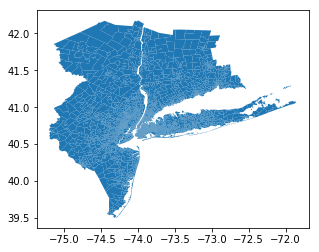

In [5]:
# url = 'https://planninglabs.carto.com/api/v2/sql?filename=region&q=SELECT%20%2A%20FROM%20region_censustract_v0&format=SHP'
# NYCzip = getGeoDataFrameFromShpFileZipUrl(url)
NYCzip=gpd.read_file('Censustracts/region.shp')
NYCzip.plot()


In [6]:
NYCzip.columns

Index(['aland_mi', 'objectid', 'statefp', 'countyfp', 'tractce', 'geoid',
       'name', 'namelsad', 'mtfcc', 'funcstat', 'aland', 'awater', 'intptlat',
       'intptlon', 'shape_leng', 'shape_area', 'atotal', 'atotal_mi',
       'cartodb_id', 'geoid_1', 'hou16', 'hou16moe', 'hou16cv', 'houv16',
       'houv16moe', 'houv16cv', 'houo16', 'houo16moe', 'houo16cv', 'hour16',
       'hour16moe', 'hour16cv', 'emtot15', 'empr15', 'emoff15', 'emins15',
       'emind15', 'emser15', 'emoth15', 'geometry'],
      dtype='object')

In [7]:
NYCzip.rename(columns={"geoid": "GEOID"},inplace=True)
NYCzip.GEOID = NYCzip.GEOID.astype(int)
cols = ['GEOID','geometry']
NYCzip = NYCzip.loc[:,cols]
#NYCzipgdp.plot(column='GEOID',legend = True)
NYCzip.shape
NYCzip.isnull().sum()

GEOID       0
geometry    0
dtype: int64

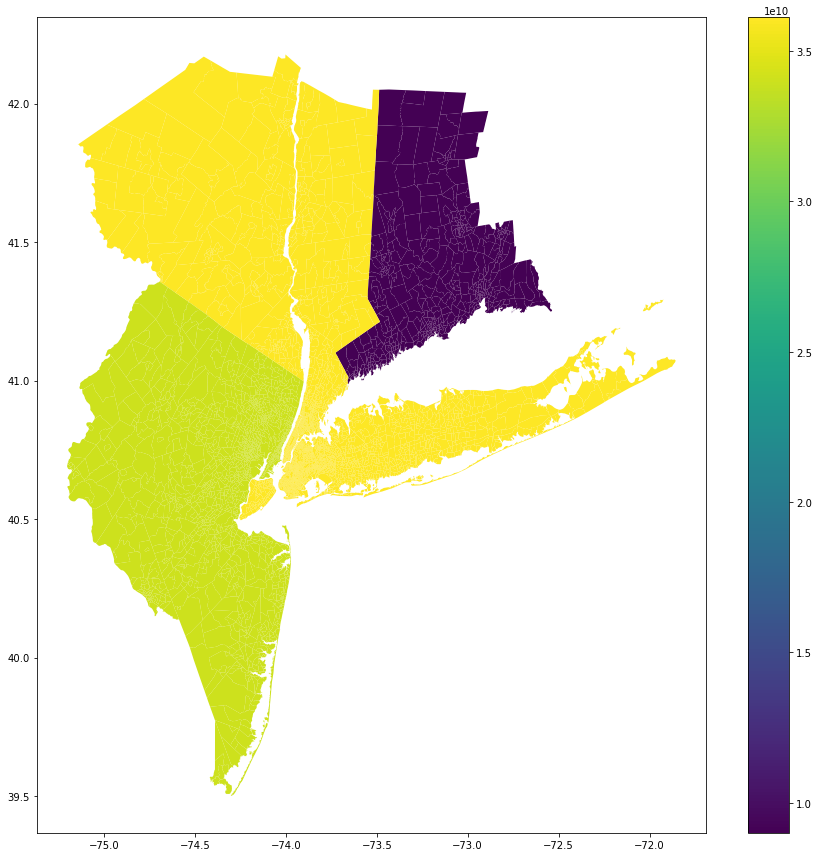

In [8]:
figure, ax = plt.subplots(figsize=(15, 15))
NYCzip.plot(column='GEOID',legend = True, ax=ax)

# Typologies
- import raw Typology file with Census data 'NY_final_data_for_typologies_1.19.19.csv'
- merges Typologies with the new Binary typologies
- map topologies

In [9]:
Typologiespd=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Typologiesgdp = gpd.GeoDataFrame(Typologiespd)
len(Typologiesgdp.columns)

82

In [10]:
Typologiesgdp.rename(columns={'geoid': "GEOID"},inplace=True)
Typologiesgdp.tail()
cols_typ = ['GEOID','Type_1.19']
print(type(Typologiesgdp.iloc[:,0][0]))
#Typologies.rename(columns={'\ufeffgeoid': "GEOID"},inplace=True)
#Typologiesgdp.geoid = Typologies.iloc[:,0]
Typologiesgdp = Typologiesgdp.loc[:,cols_typ]
Typologiesgdp.head()

<class 'numpy.float64'>


,GEOID,Type_1.19
0,9.001010e+09,VHI - Super Gentrification or Exclusion
1,9.001010e+09,VHI - Super Gentrification or Exclusion
2,9.001010e+09,VHI - Super Gentrification or Exclusion
3,9.001010e+09,VHI - Super Gentrification or Exclusion
4,9.001010e+09,VHI - Super Gentrification or Exclusion


In [11]:
Binaries=pd.read_csv('./Data/NEW_6_BINARIES_ALL.csv')
len(Binaries.columns), Binaries.shape
Binaries.drop(columns = 'Unnamed: 0', inplace=True)
Binaries.head()

,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16,GEOID
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34013021601
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34003031100
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34003036200
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34017003500
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,34017015500


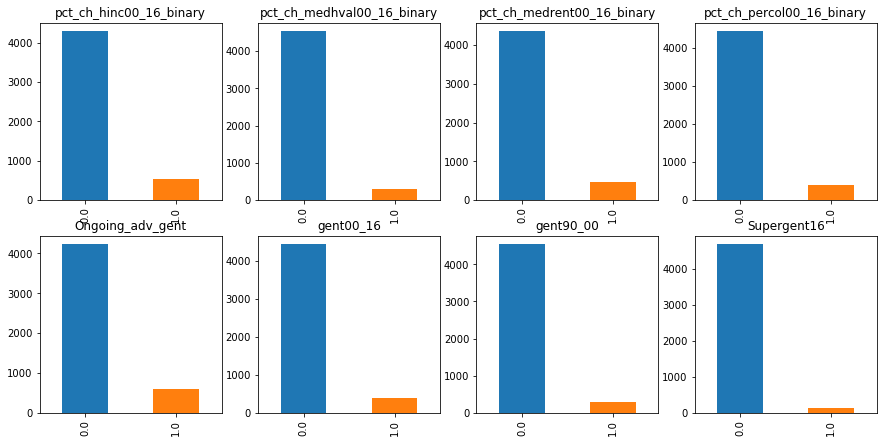

In [12]:
bin_typs = ['pct_ch_hinc00_16_binary',
            'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','pct_ch_percol00_16_binary','Ongoing_adv_gent',
            'gent00_16','gent90_00','Supergent16']
for i, column in enumerate(bin_typs):
    plt.figure(1)
    plt.subplot(4,4,i+1)
    Binaries[column].value_counts().plot(kind='bar', figsize = (15,15), title=column)
    Binaries[column].value_counts()/Binaries[column].value_counts().sum()

In [13]:
Typologiesgdp = Typologiesgdp.merge(Binaries, on= 'GEOID')
Typologiesgdp.shape

(4829, 10)

In [14]:
Typologiesgdp.isnull().sum()


GEOID                         0
Type_1.19                     0
pct_ch_percol00_16_binary     0
pct_ch_hinc00_16_binary       0
pct_ch_medhval00_16_binary    0
pct_ch_medrent00_16_binary    0
Ongoing_adv_gent              0
gent00_16                     0
gent90_00                     0
Supergent16                   0
dtype: int64

In [15]:
merged = NYCzip.merge(Typologiesgdp,on='GEOID')
merged.tail(1)

,GEOID,geometry,Type_1.19,pct_ch_percol00_16_binary,pct_ch_hinc00_16_binary,pct_ch_medhval00_16_binary,pct_ch_medrent00_16_binary,Ongoing_adv_gent,gent00_16,gent90_00,Supergent16
4828,36047152200,"POLYGON ((-73.96408699991511 40.6444069999831,...",MHI - Stable or Early Stage of Exclusion,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
print(type(merged),merged.shape)
mergedgpd = gpd.GeoDataFrame(merged)
mergedgpd.shape

<class 'geopandas.geodataframe.GeoDataFrame'> (4829, 11)


(4829, 11)

# LOAD TWITTER DATA

In [17]:
# alltwitterandcensusdata.csv
alltwitterandcensusdata = pd.read_csv('Data/alltwitterandcensusdata.csv')
alltwitterandcensusdata.rename(columns={'geojoin': "GEOID"},inplace=True)
alltwitterandcensusdata.drop(columns='Unnamed: 0',inplace=True)
print(alltwitterandcensusdata.shape)
twittercols = list(alltwitterandcensusdata.columns[:-23])+['distToHighVisitorTract',\
                                                     'distToHighTweetTract','distToMHI']
print('twittercols------------------------------')
print(list(twittercols))
print('alltwitterandcensusdata------------------------------')
print(list(alltwitterandcensusdata.columns))
twitterdata  = alltwitterandcensusdata.loc[:,twittercols]

(3105, 56)
twittercols------------------------------
['GEOID', 'total_tweets', 'userwith5_count', 'total_users', 'Monday_oddratio', 'Tuesday_oddratio', 'Wednesday_oddratio', 'Thursday_oddratio', 'Friday_oddratio', 'Saturday_oddratio', 'Sunday_oddratio', 'weekend_oddratio', 'weekday_oddratio', 'nighttime_oddratio', 'daytime_oddratio', 'local_tweets', 'local_weekend_oddratio', 'local_weekday_oddratio', 'local_nighttime_oddratio', 'local_daytime_oddratio', 'neighbor_tweets', 'neighbor_weekend_oddratio', 'neighbor_weekday_oddratio', 'neighbor_nighttime_oddratio', 'neighbor_daytime_oddratio', 'other_weekday_oddratio', 'other_weekend_oddratio', 'other_daytime_oddratio', 'other_nighttime_oddratio', 'other_tweets', 'localpercentage', 'nbrpercentage', 'visitorpercentage', 'distToHighVisitorTract', 'distToHighTweetTract', 'distToMHI']
alltwitterandcensusdata------------------------------
['GEOID', 'total_tweets', 'userwith5_count', 'total_users', 'Monday_oddratio', 'Tuesday_oddratio', 'Wednesday

# LOAD CENSUS DATA

In [18]:
Censuspd_TOD = pd.read_stata('Data/UDP_NYC_Variables.dta')
Censuspd_TOD.rename(columns={'GEOid2': "GEOID"},inplace=True)
Censuspd_TOD = Censuspd_TOD.loc[:,['GEOID','TOD']]
Censuspd_TOD.head(2)

,GEOID,TOD
0,09001010101,0.0
1,09001010102,0.0


In [19]:
# NO GEOID
Census_data_original_NOGEOID = pd.read_csv('./Data/originalcensusfeatures.csv')
Census_data_original_NOGEOID.drop(columns='Unnamed: 0',inplace=True)
cols_orig = list(Census_data_original_NOGEOID.columns)
print(cols_orig)
Census_data_original_NOGEOID.head(2)

['medrent00', 'medhval00', 'percol00', 'per_rent_00', 'pernwh00', 'hinc00', 'TOD', 'carcommuters_00']


,medrent00,medhval00,percol00,per_rent_00,pernwh00,hinc00,TOD,carcommuters_00
0,988.0,273900.0,0.231504,0.066202,0.072632,120523.998898,0.0,0.875731
1,808.0,192600.0,0.155385,0.439133,0.212597,72720.400000,1.0,0.736007


In [20]:
cols_orig_noTOD = ['medrent00', 'medhval00', 'percol00', 'per_rent_00', 'pernwh00', 'hinc00', 'carcommuters_00']
Census_data_original=pd.read_csv('NY_final_data_for_typologies_1.19.19.csv')
Census_data_original.rename(columns={'geoid': "GEOID"},inplace=True)
Census_data_original = Census_data_original.loc[:,cols_orig_noTOD+['GEOID']]
Census_data_original.loc[:,cols_orig_noTOD+['GEOID']].head(2)

,medrent00,medhval00,percol00,per_rent_00,pernwh00,hinc00,carcommuters_00,GEOID
0,1601.0,1000001.0,0.354071,0.128119,0.066080,273976.05,0.698276,9.001010e+09
1,1244.0,1000000.0,0.748477,0.108108,0.098972,290000.00,0.000000,9.001010e+09


In [21]:
Census_data_new = pd.read_csv('./Data/newcensusfeatures.csv')
Census_data_new.rename(columns={'geoid': "GEOID"},inplace=True)
Census_data_new.drop(columns=['geojoin','Unnamed: 0'],inplace=True)
Census_data_new.head(2)

,GEOID,pop00,phisp00,pnhblk00,pasian00,popden00,unempden00,pag25up00
0,34003001000,6683.181012,0.025387,0.004034,0.065236,7.729906e+06,96913.273415,0.653295
1,34003002100,2183.000000,0.025195,0.016949,0.199267,1.230491e+06,15219.084062,0.700870


In [22]:
Census_data_original['GEOID'] = pd.to_numeric(Census_data_original['GEOID'])
Censuspd_TOD['GEOID'] = pd.to_numeric(Censuspd_TOD['GEOID'])
Census_data_new['GEOID']  = pd.to_numeric(Census_data_new['GEOID'])

In [23]:
# Merge Censuspd_TOD, Census_data_original, Census_data_new
print(Censuspd_TOD.shape, Census_data_original.shape, Census_data_new.shape)
Census_new_temp = Censuspd_TOD.merge(Census_data_original,on='GEOID')
print(Census_new_temp.shape)
Census_combined = Census_data_new.merge(Census_new_temp,on='GEOID')
print(Census_combined.shape)
# (Census_combined.GEOID==Census_combined.geojoin).sum()

(5338, 2) (5298, 8) (5276, 8)
(5291, 9)
(5272, 16)


# Combine Datasets

(3105, 36) Index(['GEOID', 'total_tweets', 'userwith5_count', 'total_users',
       'Monday_oddratio', 'Tuesday_oddratio', 'Wednesday_oddratio',
       'Thursday_oddratio', 'Friday_oddratio', 'Saturday_oddratio',
       'Sunday_oddratio', 'weekend_oddratio', 'weekday_oddratio',
       'nighttime_oddratio', 'daytime_oddratio', 'local_tweets',
       'local_weekend_oddratio', 'local_weekday_oddratio',
       'local_nighttime_oddratio', 'local_daytime_oddratio', 'neighbor_tweets',
       'neighbor_weekend_oddratio', 'neighbor_weekday_oddratio',
       'neighbor_nighttime_oddratio', 'neighbor_daytime_oddratio',
       'other_weekday_oddratio', 'other_weekend_oddratio',
       'other_daytime_oddratio', 'other_nighttime_oddratio', 'other_tweets',
       'localpercentage', 'nbrpercentage', 'visitorpercentage',
       'distToHighVisitorTract', 'distToHighTweetTract', 'distToMHI'],
      dtype='object')
(3105, 46) Index(['GEOID', 'total_tweets', 'userwith5_count', 'total_users',
       'Monday_

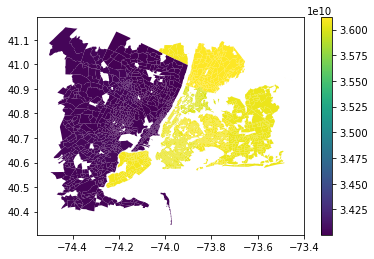

In [24]:
print(twitterdata.shape,twitterdata.columns)
TW_pd_temp = twitterdata.merge(mergedgpd, on ='GEOID')
print(TW_pd_temp.shape,TW_pd_temp.columns[:10])
TW_pd_temp = gpd.GeoDataFrame(TW_pd_temp)
figure, ax = plt.subplots()
TW_pd_temp.plot(column='GEOID',legend = True, ax=ax)

In [25]:
print(twitterdata.shape)
Census_FQpd = Census_combined.merge(twitterdata,on='GEOID')
print(Census_FQpd.shape)
Census_FQpd.head(1)

(3105, 36)
(3105, 51)


,GEOID,pop00,phisp00,pnhblk00,pasian00,popden00,unempden00,pag25up00,TOD,medrent00,...,other_weekend_oddratio,other_daytime_oddratio,other_nighttime_oddratio,other_tweets,localpercentage,nbrpercentage,visitorpercentage,distToHighVisitorTract,distToHighTweetTract,distToMHI
0,34003001000,6683.181012,0.025387,0.004034,0.065236,7.729906e+06,96913.273415,0.653295,1.0,1778.0,...,0.676851,0.697028,0.53634,4476,0.700886,0.065746,0.233368,0.046797,0.046797,0.0


## ADD GEOMETRY & TYPOLOGIES

In [26]:
print(Census_FQpd.shape,Census_FQpd.columns)
Census_FQpd = Census_FQpd.merge(mergedgpd, on ='GEOID')
print(Census_FQpd.shape,Census_FQpd.columns[:10])

(3105, 51) Index(['GEOID', 'pop00', 'phisp00', 'pnhblk00', 'pasian00', 'popden00',
       'unempden00', 'pag25up00', 'TOD', 'medrent00', 'medhval00', 'percol00',
       'per_rent_00', 'pernwh00', 'hinc00', 'carcommuters_00', 'total_tweets',
       'userwith5_count', 'total_users', 'Monday_oddratio', 'Tuesday_oddratio',
       'Wednesday_oddratio', 'Thursday_oddratio', 'Friday_oddratio',
       'Saturday_oddratio', 'Sunday_oddratio', 'weekend_oddratio',
       'weekday_oddratio', 'nighttime_oddratio', 'daytime_oddratio',
       'local_tweets', 'local_weekend_oddratio', 'local_weekday_oddratio',
       'local_nighttime_oddratio', 'local_daytime_oddratio', 'neighbor_tweets',
       'neighbor_weekend_oddratio', 'neighbor_weekday_oddratio',
       'neighbor_nighttime_oddratio', 'neighbor_daytime_oddratio',
       'other_weekday_oddratio', 'other_weekend_oddratio',
       'other_daytime_oddratio', 'other_nighttime_oddratio', 'other_tweets',
       'localpercentage', 'nbrpercentage', 'visitor

In [27]:
Census_FQpd.columns[-10:]

Index(['geometry', 'Type_1.19', 'pct_ch_percol00_16_binary',
       'pct_ch_hinc00_16_binary', 'pct_ch_medhval00_16_binary',
       'pct_ch_medrent00_16_binary', 'Ongoing_adv_gent', 'gent00_16',
       'gent90_00', 'Supergent16'],
      dtype='object')

In [28]:
typologies = ['Type_1.19','pct_ch_percol00_16_binary','pct_ch_hinc00_16_binary',\
           'pct_ch_medhval00_16_binary','pct_ch_medrent00_16_binary','pct_ch_percol00_16_binary','Ongoing_adv_gent',
                                        'gent00_16',
                                        'gent90_00',
                                      'Supergent16']

In [29]:
Census_FQpd = gpd.GeoDataFrame(Census_FQpd)

In [30]:
print(Census_FQpd.shape)
Census_FQpd.dropna(inplace=True)
print(Census_FQpd.shape)

(3105, 61)
(3105, 61)


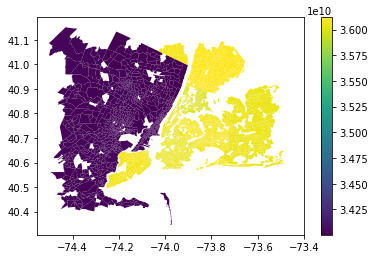

In [31]:
figure, ax = plt.subplots()
Census_FQpd.plot(column='GEOID',legend = True, ax=ax)

# Part II. Modeling

In [32]:
Census_FQpd_beforedrops = Census_FQpd.copy()


In [33]:
binary6typ


'pct_ch_medrent00_16_binary'

In [34]:
### Preprocessing Data

y = Census_FQpd[binary6typ]
X_Census_FQpd = Census_FQpd.drop(typologies+['GEOID','geometry'],axis =1).copy()
print(X_Census_FQpd.shape)
X_Census_FQpd.dropna(inplace=True)
print(X_Census_FQpd.shape)

(3105, 50)
(3105, 50)


In [35]:
X_Census_FQpd.columns

Index(['pop00', 'phisp00', 'pnhblk00', 'pasian00', 'popden00', 'unempden00',
       'pag25up00', 'TOD', 'medrent00', 'medhval00', 'percol00', 'per_rent_00',
       'pernwh00', 'hinc00', 'carcommuters_00', 'total_tweets',
       'userwith5_count', 'total_users', 'Monday_oddratio', 'Tuesday_oddratio',
       'Wednesday_oddratio', 'Thursday_oddratio', 'Friday_oddratio',
       'Saturday_oddratio', 'Sunday_oddratio', 'weekend_oddratio',
       'weekday_oddratio', 'nighttime_oddratio', 'daytime_oddratio',
       'local_tweets', 'local_weekend_oddratio', 'local_weekday_oddratio',
       'local_nighttime_oddratio', 'local_daytime_oddratio', 'neighbor_tweets',
       'neighbor_weekend_oddratio', 'neighbor_weekday_oddratio',
       'neighbor_nighttime_oddratio', 'neighbor_daytime_oddratio',
       'other_weekday_oddratio', 'other_weekend_oddratio',
       'other_daytime_oddratio', 'other_nighttime_oddratio', 'other_tweets',
       'localpercentage', 'nbrpercentage', 'visitorpercentage',
       

In [36]:
# Normalize

min_max_scaler = MinMaxScaler()

models = ['Raw','Scaled','Minmaxed']
Xdata_scaled = preprocessing.scale(X_Census_FQpd)
# ydata_scaled = preprocessing.scale(y)

Xdata_minmaxed = min_max_scaler.fit_transform(X_Census_FQpd)
# ydata_minmaxed = min_max_scaler.fit_transform(y)

dictx = {}
dictx['Raw'] = X_Census_FQpd
dictx['Scaled'] = Xdata_scaled
dictx['Minmaxed'] = Xdata_minmaxed
                    

# x = dictx[model][0]
# y = dictx[model][1]

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:176: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn("Numerical issues were encountered "
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [37]:
model_f1_scores = {}
model_recall_scores = {}
model_precision_scores = {}
imp_dict = {}
names_dict ={}
model = {}
modelslist = ['Logit','DT','RF','SVM'] 
for m in models:
    # X_train[m], X_test[m], y_train[m], y_test[m]
    dictx[m]
    model[m] = {}
    model_f1_scores[m] = {}
    model_recall_scores[m] ={}
    model_precision_scores[m] = {}
    imp_dict[m] = {}
    names_dict[m] = {}
resultset=Census_FQpd_beforedrops.copy()

In [38]:
X_train = {}
X_test = {}
y_train = {}
y_test = {}
for m in models:

    X_train[m], X_test[m], y_train[m], y_test[m] = train_test_split(dictx[m], y, test_size = 0.3, random_state = 1)    
    #x >> dictx[m][0]
    # y =>> dictx[m][1]
    print(X_train[m].shape, X_test[m].shape, y_train[m].shape, y_test[m].shape)

(2173, 50) (932, 50) (2173,) (932,)
(2173, 50) (932, 50) (2173,) (932,)
(2173, 50) (932, 50) (2173,) (932,)


In [39]:
model
def f_importances_neg(coef, names,m):
    
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[:20]
    names = names[:20]
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)  
    plt.xticks(size = 8)
    plt.show()
def f_importances_pos(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[-20:]
    names = names[-20:]
    plt.figure(figsize=(5,5))
    plt.title('Positive Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()
def f_importances_unimp(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    lenimp_2 = len(imp)//2
    imp = imp[lenimp_2-10:lenimp_2+10]
    names = names[lenimp_2-10:lenimp_2+10]
    plt.figure(figsize=(5,5))
    plt.title('Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()
def f_importances_all(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of Logistic Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()

# LR

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 50)


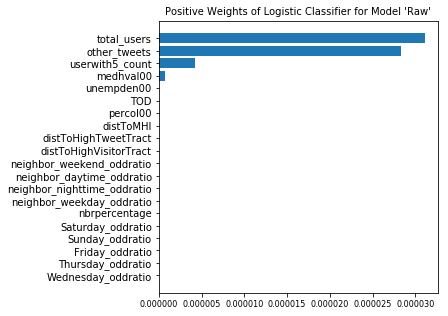

(1, 50)


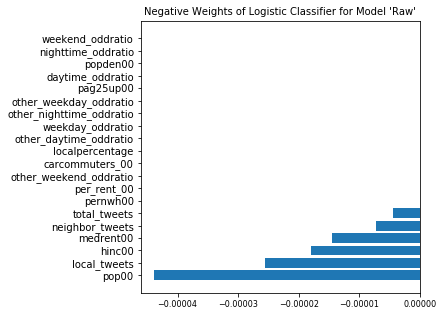

(1, 50)


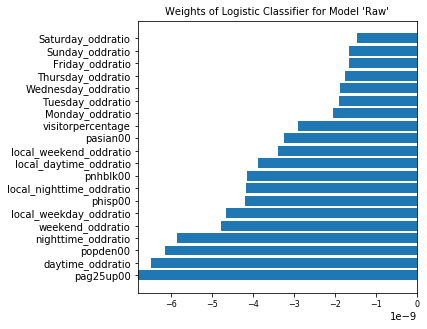

(1, 50)


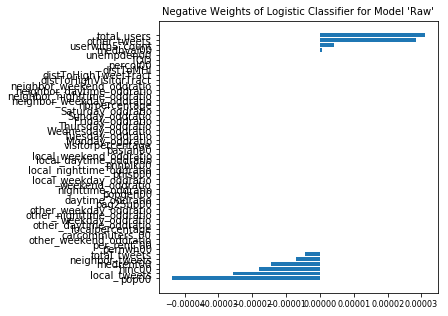

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 50)


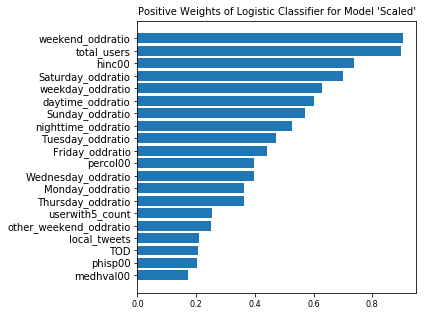

(1, 50)


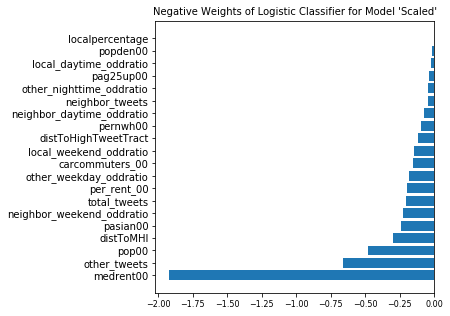

(1, 50)


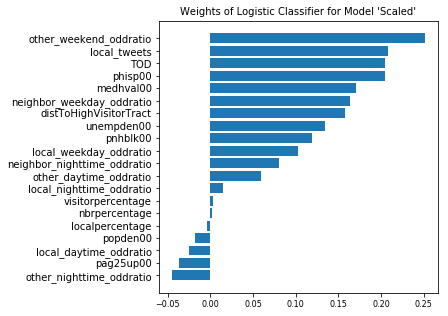

(1, 50)


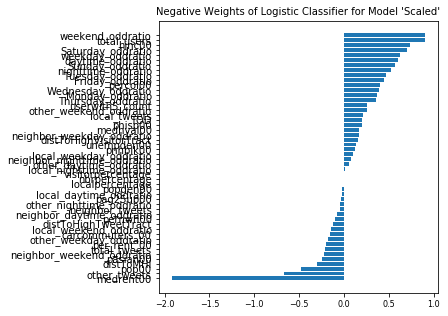

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


(1, 50)


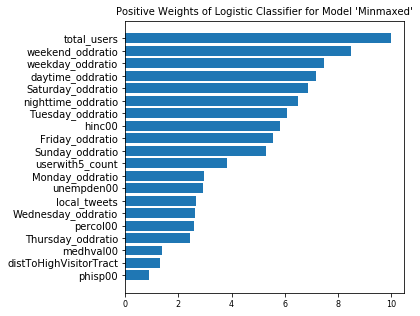

(1, 50)


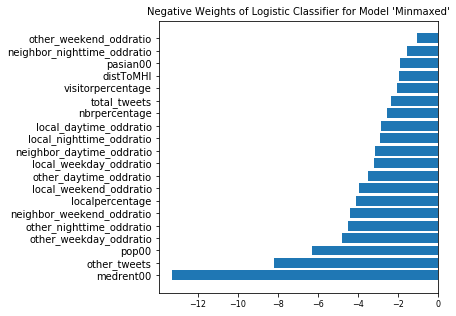

(1, 50)


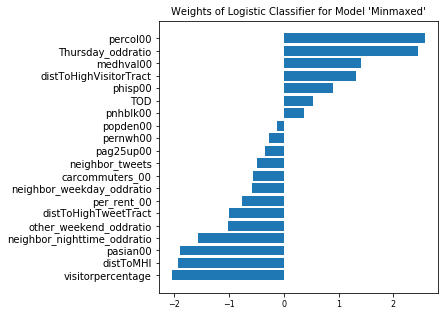

(1, 50)


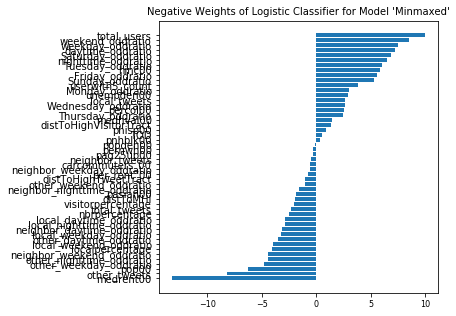

,Minmaxed,Raw,Scaled
Logit,"(-13.2936530207, -8.20793672438, -6.2852672024...","(-4.38833262034e-05, -2.55934598771e-05, -1.80...","(-1.92281332156, -0.663919452134, -0.481888211..."


In [40]:
## Logistic Reeg
imp = {}
for m in models:
#     dictx[m]
#     model[m]
# X_train[m], X_test[m], y_train[m], y_test[m]

    logit_1 = LogisticRegression(C = 10000)
#     print(X_train[m].shape,y_train[m].shape)
    logit_1.fit(X_train[m], y_train[m])
#     print(logit_1.score(X_test[m],y_test[m]))
    model[m]['Logit'] = logit_1.score(X_test[m],y_test[m])
#     resultset[m+'_Logit_predicttyp']=logit_1.predict(dictx[m])
    y_pred = logit_1.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['Logit'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['Logit'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['Logit'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    f_importances_pos(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_neg(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_unimp(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    imp3,names = zip(*sorted(zip(list(logit_1.coef_)[0],np.asarray(list(X_train['Raw'].columns)))))
    names_dict[m]['Logit'] = names
    imp_dict[m]['Logit'] =  imp3
    f_importances_all(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
model_f1_scores
pd.DataFrame(imp_dict)

In [41]:
def featureImportancePlot_dt(rf, labels,m):
    importances = rf.feature_importances_[:]
    indices = np.argsort(importances)[::-1]
    importances_10 = rf.feature_importances_[:][:10]
    indices_10 = np.argsort(importances_10)[::-1]
    #std = np.std([tree.feature_importances_ for tree in rf.estimators_],
    #         axis=0)
    pl.figure(figsize=(5,5))
    pl.title("Feature importances")
    pl.bar(range(indices_10.shape[0]), rf.feature_importances_[indices_10],
       color="SteelBlue", #yerr=std[indices]
           align="center")
    pl.xticks(range(indices_10.shape[0]), np.array(labels)[indices_10], rotation=90)
    pl.xlim([-1, indices_10.shape[0]])
    pl.show()
    print(importances) 
    
    return rf.feature_importances_[indices], np.array(labels)[indices]

# DT

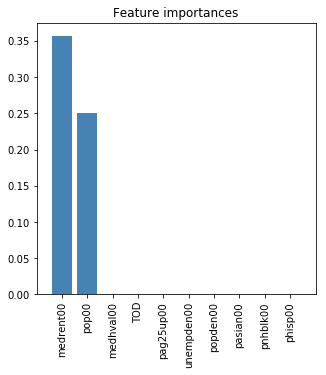

[ 0.25111199  0.          0.          0.          0.          0.          0.
  0.          0.35730223  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02779277  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.0732996   0.          0.
  0.29049341]


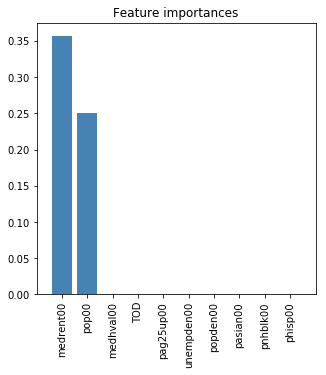

[ 0.25111199  0.          0.          0.          0.          0.          0.
  0.          0.35730223  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.02779277  0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.0732996   0.          0.
  0.29049341]


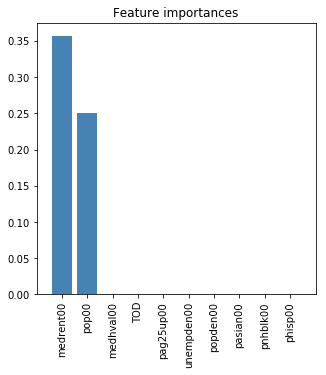

[ 0.25111199  0.          0.          0.          0.          0.          0.
  0.          0.35730223  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02779277  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.0732996   0.          0.
  0.29049341]


{'Minmaxed': {'DT': 0.10256410256410256, 'Logit': 0.23880597014925373},
 'Raw': {'DT': 0.10256410256410256, 'Logit': 0.018691588785046728},
 'Scaled': {'DT': 0.10256410256410256, 'Logit': 0.23880597014925373}}

In [42]:
seed = 5
# print(y_train.shape, X_train.shape)
for m in models:
    #     dictx[m]
    #     model[m]

    OS = []
#     param_grid = {'n_estimators':range(1,11),'max_depth':range(1,11),'max_leaf_nodes':range(2,11)}
#     dt=DecisionTreeClassifier()
#     gr=GridSearchCV(dt,param_grid=param_grid,scoring='roc_auc')
#     ds=gr.fit(X_train[m],y_train[m])

    for c in range(5):
#         print (ds.best_params_,ds.best_params_['max_depth'],ds.best_params_['max_leaf_nodes'])
        dt=DecisionTreeClassifier()
        dt = DecisionTreeClassifier(max_depth=3)
        dt.fit(X_train[m], y_train[m])
        pred=dt.predict_proba(X_test[m])[:,1]
        OS.append(dt.score(X_test[m],y_test[m]))
    model[m]['DT'] = mean(OS)
#     resultset[m+'_DT_predicttyp']=dt.predict(dictx[m])
    y_pred = dt.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['DT'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['DT'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['DT'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    imp_dict[m]['DT'], names_dict[m]['DT'] =  featureImportancePlot_dt(dt, X_Census_FQpd.columns,m)
model_f1_scores

In [43]:
model_f1_scores['Raw']['DT']

0.10256410256410256

In [44]:
resultset['actualtyp']=y

# Random Forest

In [45]:
def featureImportancePlot(rf, labels,m):
    '''plots feature importance for random forest
    rf: the random forest model fit to the data
    labels: the names of the features
    '''
    
    importances = rf.feature_importances_[:10]
    indices = np.argsort(importances)[::-1]
    std = np.std([tree.feature_importances_ for tree in rf.estimators_],
             axis=0)

    pl.figure()
    pl.title("Feature importances for Model"+ m)
    pl.bar(range(indices.shape[0]), rf.feature_importances_[indices],
       color="SteelBlue", yerr=std[indices], align="center")
    pl.xticks(range(indices.shape[0]), np.array(labels)[indices], rotation=90)
    pl.xlim([-1, indices.shape[0]])
    pl.show()


# def featureImportancePlot(rf, labels,m):
#     '''plots feature importance for random forest
#     rf: the random forest model fit to the data
#     labels: the names of the features
#     '''
#     importances = rf.feature_importances_
#     indices = np.argsort(importances)[::-1]
#     importances_10 = rf.feature_importances_[:10]
#     indices_10 = np.argsort(importances_10)[::-1]
#     std = np.std([tree.feature_importances_ for tree in rf.estimators_],
#              axis=0)

#     pl.figure(figsize=(5,5))
#     pl.title("Feature importances of Random Forest for Model "+m)
#     pl.bar(range(indices_10.shape[0]), rf.feature_importances_[indices_10],
#        color="SteelBlue", yerr=std[indices_10], align="center")
#     pl.xticks(range(indices_10.shape[0]), np.array(labels)[indices_10], rotation=90)
#     pl.xlim([-1, indices_10.shape[0]])
#     pl.show()
#     return rf.feature_importances_[indices], np.array(labels)[indices]

Raw


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 10, 'n_estimators': 9, 'max_depth': 9} 9 10
{'max_leaf_nodes': 10, 'n_estimators': 9, 'max_depth': 9} 9 10
{'max_leaf_nodes': 10, 'n_estimators': 9, 'max_depth': 9} 9 10
{'max_leaf_nodes': 10, 'n_estimators': 9, 'max_depth': 9} 9 10


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

{'max_leaf_nodes': 10, 'n_estimators': 9, 'max_depth': 9} 9 10


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


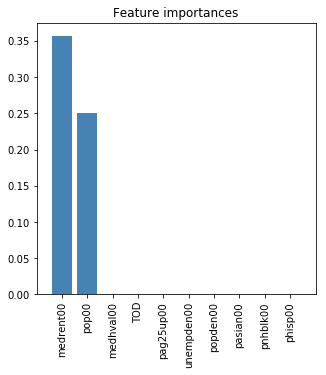

[ 0.25111199  0.          0.          0.          0.          0.          0.
  0.          0.35730223  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02779277  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.0732996   0.          0.
  0.29049341]
Scaled


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 10, 'n_estimators': 10, 'max_depth': 6} 6 10
{'max_leaf_nodes': 10, 'n_estimators': 10, 'max_depth': 6} 6 10
{'max_leaf_nodes': 10, 'n_estimators': 10, 'max_depth': 6} 6 10
{'max_leaf_nodes': 10, 'n_estimators': 10, 'max_depth': 6} 6 10


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

{'max_leaf_nodes': 10, 'n_estimators': 10, 'max_depth': 6} 6 10


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


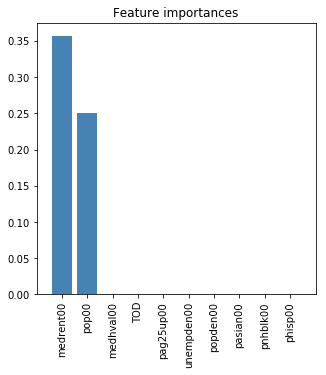

[ 0.25111199  0.          0.          0.          0.          0.          0.
  0.          0.35730223  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02779277  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.0732996   0.          0.
  0.29049341]
Minmaxed


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


{'max_leaf_nodes': 8, 'n_estimators': 8, 'max_depth': 3} 3 8
{'max_leaf_nodes': 8, 'n_estimators': 8, 'max_depth': 3} 3 8
{'max_leaf_nodes': 8, 'n_estimators': 8, 'max_depth': 3} 3 8
{'max_leaf_nodes': 8, 'n_estimators': 8, 'max_depth': 3} 3 8
{'max_leaf_nodes': 8, 'n_estimators': 8, 'max_depth': 3} 3 8


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0

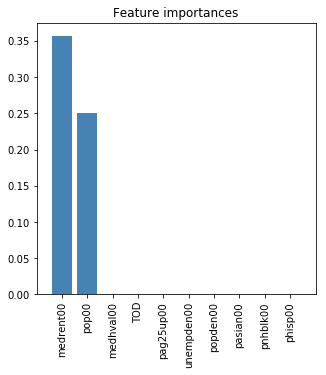

[ 0.25111199  0.          0.          0.          0.          0.          0.
  0.          0.35730223  0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.02779277  0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.0732996   0.          0.
  0.29049341]


{'Minmaxed': {'DT': 0.10256410256410256,
  'Logit': 0.23880597014925373,
  'RF': 0.0},
 'Raw': {'DT': 0.10256410256410256,
  'Logit': 0.018691588785046728,
  'RF': 0.073394495412844041},
 'Scaled': {'DT': 0.10256410256410256,
  'Logit': 0.23880597014925373,
  'RF': 0.037383177570093455}}

In [46]:
for m in models:
    #     dictx[m]
    print(m)
    param_grid = {'max_depth':range(1,11),'n_estimators':range(1,11),'max_leaf_nodes':range(2,11)}
    rf=RandomForestClassifier()
    gr=GridSearchCV(rf,param_grid=param_grid,scoring='roc_auc')
    rs=gr.fit(X_train[m],y_train[m])
    OS = []
    for c in range(5):
        print(rs.best_params_,rs.best_params_['max_depth'],rs.best_params_['max_leaf_nodes'])
        rf = RandomForestClassifier(max_depth=rs.best_params_['max_depth'],max_leaf_nodes=rs.best_params_['max_leaf_nodes'])
        rf.fit(X_train[m], y_train[m])
        pred=rf.predict_proba(X_test[m])[:,1]
        OS.append(rf.score(X_test[m],y_test[m]))
    model[m]['RF'] = mean(OS)
    resultset[m+'_RF_predicttyp']=rf.predict(dictx[m])
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['RF'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['RF'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['RF'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    imp_dict[m]['RF'], names_dict[m]['RF'] =  featureImportancePlot_dt(dt, X_Census_FQpd.columns,m)
model_f1_scores

#### Note that the features have changed considerably with the updated binary typology-- users and checkins were the most important features initially.

# SVM

In [47]:
model
def f_importances_neg(coef, names,m):
    
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[:20]
    names = names[:20]
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)  
    plt.xticks(size = 8)
    plt.show()
def f_importances_pos(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    imp = imp[-20:]
    names = names[-20:]
    plt.figure(figsize=(5,5))
    plt.title('Positive Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()
def f_importances_unimp(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    lenimp_2 = len(imp)//2
    imp = imp[lenimp_2-10:lenimp_2+10]
    names = names[lenimp_2-10:lenimp_2+10]
    plt.figure(figsize=(5,5))
    plt.title('Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.xticks(size = 8)
    plt.show()
def f_importances_all(coef, names,m):
    imp = coef
    print((imp.shape))
    imp,names = zip(*sorted(zip(list(imp)[0],names)))
    plt.figure(figsize=(5,5))
    plt.title('Negative Weights of SVM Classifier for Model \''+m+'\'', size = 10)
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
#     plt.xlabel(size=8)
    plt.xticks(size = 8)
    plt.show()



Raw
0.889484978541
0.889484978541
(1, 50)


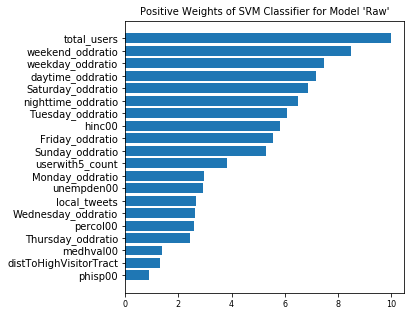

(1, 50)


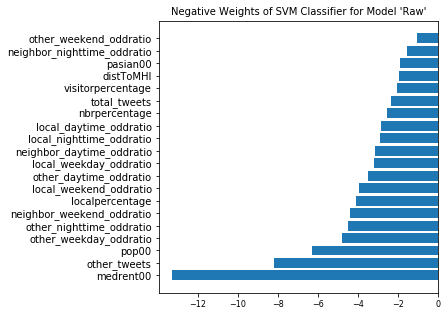

(1, 50)


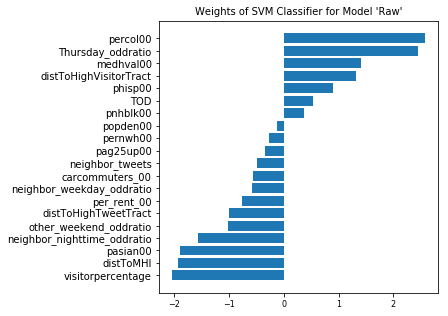

Scaled
0.893776824034
0.893776824034
(1, 50)


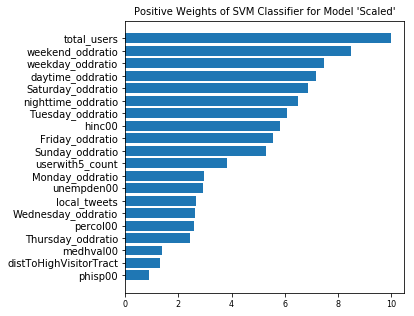

(1, 50)


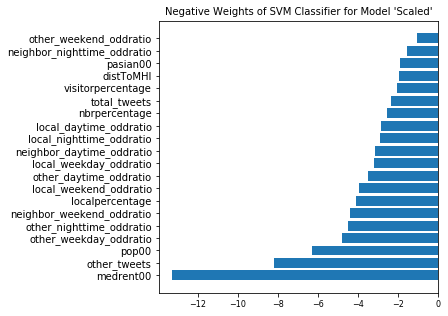

(1, 50)


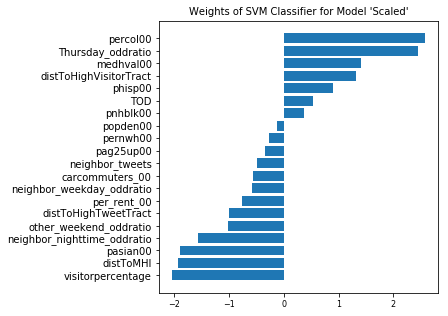

Minmaxed
0.889484978541
0.889484978541
(1, 50)


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/ADS/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


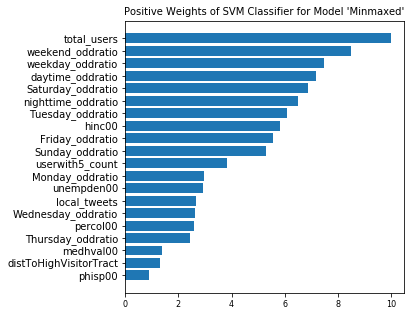

(1, 50)


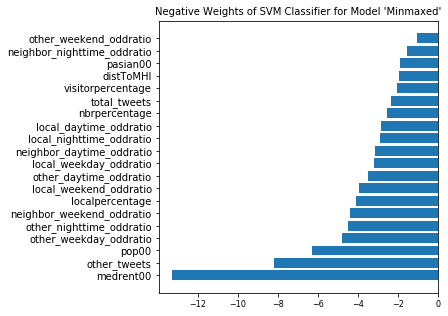

(1, 50)


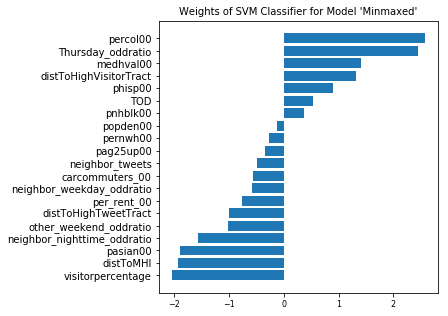

{'Minmaxed': {'DT': 0.10256410256410256,
  'Logit': 0.23880597014925373,
  'RF': 0.0,
  'SVM': 0.0},
 'Raw': {'DT': 0.10256410256410256,
  'Logit': 0.018691588785046728,
  'RF': 0.073394495412844041,
  'SVM': 0.019230769230769228},
 'Scaled': {'DT': 0.10256410256410256,
  'Logit': 0.23880597014925373,
  'RF': 0.037383177570093455,
  'SVM': 0.016129032258064516}}

In [48]:

# When C is very small, we are willing to tolerate more mistakes. If C is very big, this
# means we hardly tolerate any mistakes. So, we cannot choose a very large C if our data is not
# really separable. Let's however choose from a broad range of reasonable options.
# param_grid = {'kernel':['linear'],'C':[np.exp(i) for i in np.linspace(-10,10,10)]}
for m in models:
    print(m)
    OS = []
    #     dictx[m]
        #     model[m]
    rr = svm.SVC(gamma='auto')
    rr.fit(X_train[m], y_train[m])
    correct=1.0*(rr.predict(X_test[m])==np.asarray(y_test[m])).sum()/len(y_test[m])
    print(correct)
    print(rr.score(X_test[m],y_test[m]))
    OS.append(correct)
#     resultset[m+'_SVM_predicttyp']=rr.predict(dictx[m])
    model[m]['SVM'] = mean(OS)
    y_pred = rf.predict(X_test[m])
    y_true = y_test[m]
    model_f1_scores[m]['SVM'] = f1_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_recall_scores[m]['SVM'] = recall_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    model_precision_scores[m]['SVM'] = precision_score(y_true, y_pred, labels=None, pos_label=1, average='binary', sample_weight=None)
    f_importances_pos(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_neg(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    f_importances_unimp(logit_1.coef_, np.asarray(list(X_train['Raw'].columns)),m)
    imp3,names = zip(*sorted(zip(list(logit_1.coef_)[0],np.asarray(list(X_train['Raw'].columns)))))
    names_dict[m]['SVM'] = names
    imp_dict[m]['SVM'] = imp3 
model_f1_scores

# Summary of Results

In [49]:
X_Census_FQpd.columns

Index(['pop00', 'phisp00', 'pnhblk00', 'pasian00', 'popden00', 'unempden00',
       'pag25up00', 'TOD', 'medrent00', 'medhval00', 'percol00', 'per_rent_00',
       'pernwh00', 'hinc00', 'carcommuters_00', 'total_tweets',
       'userwith5_count', 'total_users', 'Monday_oddratio', 'Tuesday_oddratio',
       'Wednesday_oddratio', 'Thursday_oddratio', 'Friday_oddratio',
       'Saturday_oddratio', 'Sunday_oddratio', 'weekend_oddratio',
       'weekday_oddratio', 'nighttime_oddratio', 'daytime_oddratio',
       'local_tweets', 'local_weekend_oddratio', 'local_weekday_oddratio',
       'local_nighttime_oddratio', 'local_daytime_oddratio', 'neighbor_tweets',
       'neighbor_weekend_oddratio', 'neighbor_weekday_oddratio',
       'neighbor_nighttime_oddratio', 'neighbor_daytime_oddratio',
       'other_weekday_oddratio', 'other_weekend_oddratio',
       'other_daytime_oddratio', 'other_nighttime_oddratio', 'other_tweets',
       'localpercentage', 'nbrpercentage', 'visitorpercentage',
       

In [50]:
X_Census_FQpd.shape

(3105, 50)

In [51]:
df1 = pd.DataFrame(model_f1_scores)
df2 = pd.DataFrame(model_recall_scores)
df3 =pd.DataFrame(model_precision_scores)
result = pd.concat([df1, df2,df3], axis=1, sort=False)
result

,Minmaxed,Raw,Scaled,Minmaxed,Raw,Scaled,Minmaxed,Raw,Scaled
DT,0.102564,0.102564,0.102564,0.058252,0.058252,0.058252,0.428571,0.428571,0.428571
Logit,0.238806,0.018692,0.238806,0.155340,0.009709,0.155340,0.516129,0.250000,0.516129
RF,0.000000,0.073394,0.037383,0.000000,0.038835,0.019417,0.000000,0.666667,0.500000
SVM,0.000000,0.019231,0.016129,0.000000,0.009709,0.009709,0.000000,1.000000,0.047619


In [52]:
model_name

'4_CENSUS_TW_pct_ch_medrent00_16'

In [53]:
result.to_csv('./Results/Scores'+model_name+'.csv')

In [54]:
names_pd = pd.DataFrame()
counter = {}
for m in models:
    print(m)
    for standarized in modelslist:
        for i, weights in enumerate(names_dict[m][standarized]):
            standarized_m = str(standarized)+'_'+str(m)
            names_pd.loc[standarized_m,weights] = imp_dict[m][standarized][i]


Raw
Scaled
Minmaxed


In [55]:
for i in names_pd.index:
    print(names_pd.loc[i].idxmax())

total_users
medrent00
medrent00
total_users
weekend_oddratio
medrent00
medrent00
total_users
total_users
medrent00
medrent00
total_users


In [56]:
model_name

'4_CENSUS_TW_pct_ch_medrent00_16'

In [57]:
names_pd.to_csv('./Results/'+model_name+'.csv')
names_pd

,pop00,local_tweets,hinc00,medrent00,neighbor_tweets,total_tweets,pernwh00,per_rent_00,other_weekend_oddratio,carcommuters_00,...,distToHighVisitorTract,distToHighTweetTract,distToMHI,percol00,TOD,unempden00,medhval00,userwith5_count,other_tweets,total_users
Logit_Raw,-0.000044,-0.000026,-0.000018,-0.000014,-0.000007,-0.000004,-1.206465e-08,-1.027452e-08,-8.370411e-09,-8.134863e-09,...,-3.812971e-10,-2.502195e-10,-1.101361e-10,1.206571e-09,2.405251e-09,2.804741e-08,7.343621e-07,0.000004,0.000028,0.000031
DT_Raw,0.251112,0.000000,0.000000,0.357302,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.904934e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
RF_Raw,0.251112,0.000000,0.000000,0.357302,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.904934e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
SVM_Raw,-6.285267,2.661832,5.817914,-13.293653,-0.482716,-2.322078,-2.785909e-01,-7.534128e-01,-1.024303e+00,-5.597884e-01,...,1.324661e+00,-1.006959e+00,-1.931904e+00,2.579675e+00,5.275560e-01,2.937065e+00,1.402231e+00,3.839391,-8.207937,9.986647
Logit_Scaled,-0.481888,0.208477,0.739270,-1.922813,-0.047415,-0.208800,-9.619329e-02,-1.992849e-01,2.517566e-01,-1.581560e-01,...,1.572506e-01,-1.224475e-01,-3.034636e-01,3.968217e-01,2.045962e-01,1.347783e-01,1.709750e-01,0.254053,-0.663919,0.899395
DT_Scaled,0.251112,0.000000,0.000000,0.357302,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.904934e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
RF_Scaled,0.251112,0.000000,0.000000,0.357302,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.904934e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000
SVM_Scaled,-6.285267,2.661832,5.817914,-13.293653,-0.482716,-2.322078,-2.785909e-01,-7.534128e-01,-1.024303e+00,-5.597884e-01,...,1.324661e+00,-1.006959e+00,-1.931904e+00,2.579675e+00,5.275560e-01,2.937065e+00,1.402231e+00,3.839391,-8.207937,9.986647
Logit_Minmaxed,-6.285267,2.661832,5.817914,-13.293653,-0.482716,-2.322078,-2.785909e-01,-7.534128e-01,-1.024303e+00,-5.597884e-01,...,1.324661e+00,-1.006959e+00,-1.931904e+00,2.579675e+00,5.275560e-01,2.937065e+00,1.402231e+00,3.839391,-8.207937,9.986647
DT_Minmaxed,0.251112,0.000000,0.000000,0.357302,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,2.904934e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000


- You can refer to https://github.com/mv1742/updny_2